In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. check if data are missing 

In [2]:
# load data
df = pd.read_csv("data/listings.csv.gz")

In [3]:
# give a overview to the data
display(df.head())

# description of the columns can be find under the url
url = "https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596"

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,218831,https://www.airbnb.com/rooms/218831,20241225065851,2024-12-25,city scrape,Sea-life apartment,Experience the International Film Festival in ...,Park in front of the building,https://a0.muscache.com/pictures/1953829/3a860...,137588,https://www.airbnb.com/users/show/137588,Dimitrios,2010-06-03,"Thessalonika, Greece","I am Dimitris S., and teach computer science,...",NaN,NaN,67%,f,https://a0.muscache.com/im/users/137588/profil...,https://a0.muscache.com/im/users/137588/profil...,NaN,2,2,"['email', 'phone']",t,t,"Kalamaria, Greece",Kalamaria,NaN,40.57274,22.95667,Entire rental unit,Entire home/apt,4,1.0,1 bath,3.0,2.0,"[""Luggage dropoff allowed"", ""First aid kit"", ""...",$90.00,4,90,4,4,90,90,4.0,90.0,NaN,t,23,53,83,358,2024-12-25,1,0,0,2020-02-02,2020-02-02,4.00,5.00,4.00,5.00,5.00,5.00,5.00,00000049330,f,1,1,0,0,0.02
1,376955,https://www.airbnb.com/rooms/376955,20241225065851,2024-12-25,city scrape,3 bedroom 145m2 apartment close to the seaside,This is a 3 bedroom apartment in a lovely quit...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1894819,https://www.airbnb.com/users/show/1894819,Olivia,2012-03-10,"Thessalonika, Greece","I am a architect, I would love travelling and ...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/1894819/profi...,https://a0.muscache.com/im/users/1894819/profi...,NaN,1,2,"['email', 'phone']",t,t,NaN,Thessaloniki,NaN,40.59683,22.95394,Entire rental unit,Entire home/apt,4,2.0,2 baths,3.0,3.0,"[""Iron"", ""Indoor fireplace"", ""Hangers"", ""Hair ...",$50.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,28,58,88,363,2024-12-25,19,0,0,2012-06-11,2017-05-31,4.94,4.79,4.89,5.00,4.78,4.68,4.61,NaN,f,1,1,0,0,0.12
2,483128,https://www.airbnb.com/rooms/483128,20241225065851,2024-12-25,city scrape,Stel's apt in Thessaloniki center!,NaN,The apartment is located in the heart of the c...,https://a0.muscache.com/pictures/5941836/084cc...,2358521,https://www.airbnb.com/users/show/2358521,Stelios,2012-05-13,"Thessalonika, Greece",Hi everyone! I'm Stelios and I'm a cook! \r\nI...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/2358521/profi...,https://a0.muscache.com/im/users/2358521/profi...,NaN,1,1,"['email', 'phone']",t,t,"Thessaloniki, Central Macedonia, Greece",Thessaloniki,NaN,40.63942,22.95121,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Drying rack for clothing"", ""Cen...",$38.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,21,51,81,356,2024-12-25,402,26,1,2012-06-02,2024-12-15,4.80,4.84,4.78,4.95,4.95,4.73,4.75,00000502736,f,1,1,0,0,2.63
3,494816,https://www.airbnb.com/rooms/494816,20241225065851,2024-12-25,previous scrape,"City View Apartment ""Thessalo

# drop unnessesary columns

In [4]:
# col i dont use for models building
not_used_col = ['id',       
 'listing_url',
 'name',
 'scrape_id',
 'last_scraped',
 'description', # mit nlp aufbereiten
 'neighborhood_overview', # mit nlp aufbereiten
 'picture_url',
 'host_url',
 'host_name',
 'host_about', # mit nlp
 'host_thumbnail_url',
 'host_picture_url',
 'amenities', # zur vereinfachung
 'license'
 ]

In [5]:
df = df.drop(columns=not_used_col)

In [6]:
shape = df.shape
print("count rows: ",shape[0], "count columns: ", shape[1])
print("columnnames: ", df.columns)
print(shape)

count rows:  4637 count columns:  60
columnnames:  Index(['source', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'nu

# split date column in year-month-day

In [7]:
datumsspalten = ['host_since', 'first_review', 'last_review', 'calendar_last_scraped']

for spalte in datumsspalten:
    if spalte in df.columns:
        df[spalte] = pd.to_datetime(df[spalte], errors='coerce')
        
        if df[spalte].notna().any():
            try:
                df[f'{spalte}_year'] = df[spalte].dt.year
                df[f'{spalte}_month'] = df[spalte].dt.month
                df[f'{spalte}_day'] = df[spalte].dt.day
            except Exception as e:
                print(f"Fehler bei Spalte {spalte}: {e}")
        
            # df.drop(columns=[spalte], inplace=True)
        

In [8]:
df.drop(columns=datumsspalten, inplace=True)

In [9]:
# convert this as int32
float_number_date =  ['first_review_year',
 'first_review_month',
 'first_review_day',
 'last_review_month',
 'last_review_day',
 'reviews_per_month',
 'last_review_year']

df[float_number_date] = df[float_number_date].fillna(-1).astype('int32')

# check again if data missing

In [11]:
df.isnull().sum()

source                                             0
host_id                                            0
host_location                                   1296
host_response_time                               496
host_response_rate                               496
host_acceptance_rate                             287
host_is_superhost                                270
host_neighbourhood                              4533
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   2720
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    4637
latitude                                           0
longitude                                          0
property_type                                 

In [12]:
# count nan values in each columns
column_nan_count = df.isnull().sum()
nan_threshold = shape[0] * 0.2

print("missing threshold: ", nan_threshold)
print()
print("NaN count per column:")
print(column_nan_count)

missing threshold:  927.4000000000001

NaN count per column:
source                                             0
host_id                                            0
host_location                                   1296
host_response_time                               496
host_response_rate                               496
host_acceptance_rate                             287
host_is_superhost                                270
host_neighbourhood                              4533
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   2720
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    4637
latitude                                           0
longitude                             

In [27]:
# drop columns where 20% of the data missing
df_clean = df.copy()

# this give us the columns where NaN is < threshold
col_clean = column_nan_count[column_nan_count<nan_threshold].index

# check again columns
df_clean[col_clean].isnull().sum()

# df with new columns
df_clean = df_clean[col_clean]

# get which type of structure columns hase
df_clean.dtypes

# select columns which has numeric dtype
numeric_col = df_clean.select_dtypes(exclude='object')

df_clean.isnull().sum()

source                                            0
host_id                                           0
host_response_time                              496
host_response_rate                              496
host_acceptance_rate                            287
host_is_superhost                               270
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms                                       338
bathrooms_text                                    0
bedrooms    

# convert list values as columns 

In [14]:
list_values_col = ['host_verifications']
df[list_values_col].dtypes

host_verifications    object
dtype: object

In [15]:
print(df[list_values_col].head(10))

                 host_verifications
0                ['email', 'phone']
1                ['email', 'phone']
2                ['email', 'phone']
3                ['email', 'phone']
4  ['email', 'phone', 'work_email']
5                ['email', 'phone']
6                ['email', 'phone']
7                ['email', 'phone']
8  ['email', 'phone', 'work_email']
9                ['email', 'phone']


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Test DataFrame kopieren
df1 = df.copy()

#  Strings in echte Listen umwandeln
df_clean['host_verifications'] = df_clean['host_verifications'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Initialisiere den Binarizer
mlb = MultiLabelBinarizer()

# Wandle die Listen in eine One-Hot-Encoding-Matrix um
verifications_ohe = mlb.fit_transform(df_clean['host_verifications'])

# In ein DataFrame mit passenden Spaltennamen umwandeln
verifications_df = pd.DataFrame(
    verifications_ohe,
    columns=mlb.classes_,
    index=df.index
)

# Mit originalem DataFrame zusammenfügen
df_clean = pd.concat([df_clean.drop(columns=['host_verifications']), verifications_df], axis=1)

# remove price column the "$" and convert it into float

In [47]:
df_clean['price'] = df_clean['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)          

# remove host_response, host_acceptance_rate column the "%" and convert it into float

In [33]:
percent_col = ['host_response_rate', 'host_acceptance_rate']

df_clean[percent_col] = df[percent_col].apply(
    lambda col: col.astype(str).str.replace('%', '').astype(float)
)

In [48]:
df_clean.head()

,source,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day,calendar_last_scraped_year,calendar_last_scraped_month,calendar_last_scraped_day
0,city scrape,137588,NaN,NaN,67.0,f,2,2,"['email', 'phone']",t,t,Kalamaria,40.57274,22.95667,Entire rental unit,Entire home/apt,4,1.0,1 bath,3.0,2.0,90.0,4,90,4,4,90,90,4.0,90.0,t,23,53,83,358,1,0,0,4.00,5.00,4.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0,2010,6,3,2020,2,2,2020,2,2,2024,12,25
1,city scrape,1894819,a few days or more,0.0,NaN,f,1,2,"['email', 'phone']",t,t,Thessaloniki,40.59683,22.95394,Entire rental unit,Entire home/apt,4,2.0,2 baths,3.0,3.0,50.0,28,1125,28,28,1125,1125,28.0,1125.0,t,28,58,88,363,19,0,0,4.94,4.79,4.89,5.00,4.78,4.68,4.61,f,1,1,0,0,0,2012,3,10,2012,6,11,2017,5,31,2024,12,25
2,city scrape,2358521,within an hour,100.0,100.0,t,1,1,"['email', 'phone']",t,t,Thessaloniki,40.63942,22.95121,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,38.0,2,1125,2,2,1125,1125,2.0,1125.0,t,21,51,81,356,402,26,1,4.80,4.84,4.78,4.95,4.95,4.73,4.75,f,1,1,0,0,2,2012,5,13,2012,6,2,2024,12,15,2024,12,25
3,previous scrape,1977386,within an hour,100.0,100.0,NaN,84,93,"['email', 'phone']",t,t,Neapolis – Sykeon,40.64763,22.94309,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,NaN,NaN,20,120,3,20,60,1125,19.9,1117.8,t,0,0,0,208,46,2,0,4.73,4.87,4.89,4.85,4.85,4.46,4.83,t,33,33,0,0,0,2012,3,20,2013,3,28,2024,2,3,2024,12,25
4,city scrape,1193625,within an hour,100.0,100.0,t,11,12,"['email', 'phone', 'work_email']",t,t,Thessaloniki,40.64008,22.95598,Entire serviced apartment,Entire home/apt,2,1.0,1 bath,0.0,1.0,66.0,7,1125,3,75,1125,1125,11.1,1125.0,t,5,28,58,248,8,0,0,4.38,4.25,4.50,4.75,5.00,4.50,4.25,t,6,6,0,0,0,2011,9,22,2012,10,24,2023,10,17,2024,12,25


# convert t = 1 and f = 0

In [49]:
boolean_col = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']

df_clean[boolean_col] = df[boolean_col].replace({'t': 1, 'f': 0})

/tmp/ipykernel_105960/1498794606.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[boolean_col] = df[boolean_col].replace({'t': 1, 'f': 0})


In [50]:
df_objects = df_clean.copy()
df_objects = df_objects.select_dtypes(include="object")
df_objects.head(5)

,source,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text
0,city scrape,NaN,"['email', 'phone']",Kalamaria,Entire rental unit,Entire home/apt,1 bath
1,city scrape,a few days or more,"['email', 'phone']",Thessaloniki,Entire rental unit,Entire home/apt,2 baths
2,city scrape,within an hour,"['email', 'phone']",Thessaloniki,Entire condo,Entire home/apt,1 bath
3,previous scrape,within an hour,"['email', 'phone']",Neapolis – Sykeon,Entire rental unit,Entire home/apt,1 bath
4,city scrape,within an hour,"['email', 'phone', 'work_email']",Thessaloniki,Entire serviced apartment,Entire home/apt,1 bath


In [51]:
t = df_clean.select_dtypes(include="object")
df_clean.dtypes

source                                           object
host_id                                           int64
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                               float64
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                            int64
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       

In [52]:
df_clean['host_acceptance_rate'].unique()

array([ 67.,  nan, 100.,  65.,  63.,  99.,  88.,   0.,  71.,  89.,  43.,
        97.,  11.,  40.,  33.,  85.,  50.,  80.,  96.,  51.,  74.,  94.,
        91.,  92.,  93.,  70.,  79.,  25.,  77.,  36.,  75.,  39.,  98.,
        54.,  29.,   8.,  83.,  20.,  55.,  56.,  46.,  95.,  82.,  78.,
        13.,  17.,  68.,  44.,   2.,  60.,  47.,  90.,  14.,  81.,  10.,
        41.,  24.,  23.,  86.,  84.,  15.,  35.,  31.,  22.,  27.,  30.,
        64.,  32.,  26.,  76.,  73.,  87.,   6.,  38.,  58.,  37.,  42.,
        48.,  16.,  53.])

In [37]:
count = df_objects.nunique()
count

source                      2
host_response_time          4
host_is_superhost           2
host_verifications          5
host_has_profile_pic        2
host_identity_verified      2
neighbourhood_cleansed      7
property_type              33
room_type                   4
bathrooms_text             16
price                     301
has_availability            1
instant_bookable            2
dtype: int64

## 1.2 Handle Nan Values with Imputer 

In [48]:
import numpy as np
from sklearn.impute import SimpleImputer

In [58]:
# select columns which has numeric dtype
numeric_col = df_clean.select_dtypes(exclude='object')

In [59]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# use only numeric columns for the Imputer
imp_mean.fit(df_clean[numeric_col.columns])
df_clean[numeric_col.columns] = imp_mean.fit_transform(df_clean[numeric_col.columns])


In [60]:
df_clean.head(5)

,source,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day,calendar_last_scraped_year,calendar_last_scraped_month,calendar_last_scraped_day,email,phone,work_email
0,city scrape,137588.0,NaN,96.615793,67.00000,0.000000,2.0,2.0,1.0,1.0,Kalamaria,40.57274,22.95667,Entire rental unit,Entire home/apt,4.0,1.000000,1 bath,3.0,2.000000,90.000000,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,1.0,23.0,53.0,83.0,358.0,1.0,0.0,0.0,4.00,5.00,4.00,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,0.0,2010.0,6.0,3.0,2020.0,2.0,2.0,2020.0,2.0,2.0,2024.0,12.0,25.0,1.0,1.0,0.0
1,city scrape,1894819.0,a few days or more,0.000000,91.75908,0.000000,1.0,2.0,1.0,1.0,Thessaloniki,40.59683,22.95394,Entire rental unit,Entire home/apt,4.0,2.000000,2 baths,3.0,3.000000,50.000000,28.0,1125.0,28.0,28.0,1125.0,1125.0,28.0,1125.0,1.0,28.0,58.0,88.0,363.0,19.0,0.0,0.0,4.94,4.79,4.89,5.00,4.78,4.68,4.61,0.0,1.0,1.0,0.0,0.0,0.0,2012.0,3.0,10.0,2012.0,6.0,11.0,2017.0,5.0,31.0,2024.0,12.0,25.0,1.0,1.0,0.0
2,city scrape,2358521.0,within an hour,100.000000,100.00000,1.000000,1.0,1.0,1.0,1.0,Thessaloniki,40.63942,22.95121,Entire condo,Entire home/apt,2.0,1.000000,1 bath,1.0,1.000000,38.000000,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,1.0,21.0,51.0,81.0,356.0,402.0,26.0,1.0,4.80,4.84,4.78,4.95,4.95,4.73,4.75,0.0,1.0,1.0,0.0,0.0,2.0,2012.0,5.0,13.0,2012.0,6.0,2.0,2024.0,12.0,15.0,2024.0,12.0,25.0,1.0,1.0,0.0
3,previous scrape,1977386.0,within an hour,100.000000,100.00000,0.340966,84.0,93.0,1.0,1.0,Neapolis – Sykeon,40.64763,22.94309,Entire rental unit,Entire home/apt,3.0,1.081298,1 bath,2.0,1.918919,93.616282,20.0,120.0,3.0,20.0,60.0,1125.0,19.9,1117.8,1.0,0.0,0.0,0.0,208.0,46.0,2.0,0.0,4.73,4.87,4.89,4.85,4.85,4.46,4.83,1.0,33.0,33.0,0.0,0.0,0.0,2012.0,3.0,20.0,2013.0,3.0,28.0,2024.0,2.0,3.0,2024.0,12.0,25.0,1.0,1.0,0.0
4,city scrape,1193625.0,within an hour,100.000000,100.00000,1.000000,11.0,12.0,1.0,1.0,Thessaloniki,40.64008,22.95598,Entire serviced apartment,Entire home/apt,2.0,1.000000,1 bath,0.0,1.000000,66.000000,7.0,1125.0,3.0,75.0,1125.0,1125.0,11.1,1125.0,1.0,5.0,28.0,58.0,248.0,8.0,0.0,0.0,4.38,4.25,4.50,4.75,5.00,4.50,4.25,1.0,6.0,6.0,0.0,0.0,0.0,2011.0,9.0,22.0,2012.0,10.0,24.0,2023.0,10.0,17.0,2024.0,12.0,25.0,1.0,1.0,1.0


In [61]:
df_clean.isnull().sum()

source                                            0
host_id                                           0
host_response_time                              496
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms                                         0
bathrooms_text                                    0
bedrooms                                          0
beds        

# one-hot-encoding bei object dtypes

In [21]:
df_objects_encoded = pd.get_dummies(df_objects, dtype=int)
df_objects_encoded.head(5)

,source_city scrape,source_previous scrape,"host_location_Aarhus, Denmark","host_location_Agios Pavlos, Greece","host_location_Alexandroupoli, Greece","host_location_Amsterdam, Netherlands","host_location_Aridaia, Greece","host_location_Athens, Greece","host_location_Baltimore, MD",host_location_Belgium,"host_location_Belgrade, Serbia","host_location_Berlin, Germany","host_location_Boston, MA","host_location_Brighton, United Kingdom","host_location_Brussels, Belgium","host_location_Chania, Greece","host_location_Cologne, Germany","host_location_Copenhagen, Denmark","host_location_Corinth, Greece","host_location_Dortmund, Germany","host_location_Doubia Chalkidikis, Greece","host_location_Drama, Greece","host_location_Dromana, Australia","host_location_Dubai, United Arab Emirates","host_location_Düsseldorf, Germany","host_location_England, United Kingdom","host_location_Epanomi, Greece","host_location_Evosmos, Greece","host_location_Filderstadt, Germany","host_location_Filyro, Greece","host_location_Frankfurt, Germany","host_location_Fredericton, Canada","host_location_Freetown, Sierra Leone","host_location_Galatista, Greece","host_location_Glyfada, Greece","host_location_Gothenburg, Sweden",host_location_Greece,"host_location_Halkidiki, Greece","host_location_Hamburg, Germany","host_location_Heraklion, Greece","host_location_Ionia Thessalonikis, Greece","host_location_Kalamaria Municipality, Greece","host_location_Kalamaria, Greece","host_location_Kallikrateia, Greece","host_location_Kalochori, Greece","host_location_Karditsa, Greece","host_location_Kassandreia, Greece","host_location_Kastoria, Greece","host_location_Katerini, Greece","host_location_Kilkis, Greece","host_location_Komotini, Greece","host_location_Kozani, Greece","host_location_Krefeld, Germany","host_location_Krya Vrysi, Greece","host_location_Limassol, Cyprus","host_location_London, United Kingdom","host_location_Los Angeles, CA","host_location_Losser, Netherlands","host_location_Lozanj, Serbia",host_location_Luxembourg,"host_location_Makedonia Thraki, Greece","host_location_Mesaria, Greece","host_location_Moraitika, Greece","host_location_Moscow, Russia","host_location_Munich, Germany","host_location_Neapoli, Greece","host_location_Neo Psychiko, Greece",host_location_Netherlands,"host_location_New York, NY","host_location_Nikaia, Greece","host_location_Niš, Serbia","host_location_North Bergen, NJ","host_location_Novi Sad, Serbia","host_location_Obernburg, Germany","host_location_Oraiokastro, Greece","host_location_Panorama, Greece","host_location_Paris, France","host_location_Pefka, Greece","host_location_Pefkochori, Greece","host_location_Peloponnisos Dytiki Ellada ke Ionio, Greece","host_location_Peraia, Greece","host_location_Philadelphia, PA","host_location_Piraeus, Greece","host_location_Plagiari, Greece","host_location_Polichni, Greece","host_location_Poligiros, Greece","host_location_Pylaia, Greece","host_location_Reading, United Kingdom","host_location_Rhodes, Greece","host_location_Saint Petersburg, Russia","host_location_Sde Boker, Israel","host_location_Serres, Greece","host_location_Sikies, Greece","host_location_Skopje, North Macedonia","host_location_Sofia, Bulgaria","host_location_St. Gallen, Switzerland","host_location_St. Julian's, Malta","host_location_Stavroupoli, Greece","host_location_Stockholm, Sweden","host_location_Sykia Chalkidikis, Greece","host_location_Sykies, Greece","host_location_Sävedalen, Sweden","host_location_Taormina, Italy","host_location_Tel Aviv-Yafo, Israel","host_location_Thera, Greece","host_location_Thermi, Greece","host_location_Thessalonika, Greece","host_location_Thessaloniki, Greece","host_location_Toumpa, Greece","host_location_Triadi, Greece","host_location_Trilofo, Greece","host_location_Varberg, Sweden","host_location_Vasilika, Greece","host_location_Velventos, Greece","host_location_Veria, Greece","host_location_Victoria, Australia","host_location_Warsaw, Poland","host_location_Winterthur, Switzerland","host_

In [23]:
# Entferne die ursprünglichen Object-Spalten aus df
df = df.drop(columns=df_objects.columns)

# Füge die One-Hot-encoded-Spalten hinzu
df = pd.concat([df, df_objects_encoded], axis=1)

In [24]:
df.head(5)

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day,calendar_last_scraped_year,calendar_last_scraped_month,calendar_last_scraped_day,email,phone,work_email,source_city scrape,source_previous scrape,"host_location_Aarhus, Denmark","host_location_Agios Pavlos, Greece","host_location_Alexandroupoli, Greece","host_location_Amsterdam, Netherlands","host_location_Aridaia, Greece","host_location_Athens, Greece","host_location_Baltimore, MD",host_location_Belgium,"host_location_Belgrade, Serbia","host_location_Berlin, Germany","host_location_Boston, MA","host_location_Brighton, United Kingdom","host_location_Brussels, Belgium","host_location_Chania, Greece","host_location_Cologne, Germany","host_location_Copenhagen, Denmark","host_location_Corinth, Greece","host_location_Dortmund, Germany","host_location_Doubia Chalkidikis, Greece","host_location_Drama, Greece","host_location_Dromana, Australia","host_location_Dubai, United Arab Emirates","host_location_Düsseldorf, Germany","host_location_England, United Kingdom","host_location_Epanomi, Greece","host_location_Evosmos, Greece","host_location_Filderstadt, Germany","host_location_Filyro, Greece","host_location_Frankfurt, Germany","host_location_Fredericton, Canada","host_location_Freetown, Sierra Leone","host_location_Galatista, Greece","host_location_Glyfada, Greece","host_location_Gothenburg, Sweden",host_location_Greece,"host_location_Halkidiki, Greece","host_location_Hamburg, Germany","host_location_Heraklion, Greece","host_location_Ionia Thessalonikis, Greece","host_location_Kalamaria Municipality, Greece","host_location_Kalamaria, Greece","host_location_Kallikrateia, Greece","host_location_Kalochori, Greece","host_location_Karditsa, Greece","host_location_Kassandreia, Greece","host_location_Kastoria, Greece","host_location_Katerini, Greece","host_location_Kilkis, Greece","host_location_Komotini, Greece","host_location_Kozani, Greece","host_location_Krefeld, Germany","host_location_Krya Vrysi, Greece","host_location_Limassol, Cyprus","host_location_London, United Kingdom","host_location_Los Angeles, CA","host_location_Losser, Netherlands","host_location_Lozanj, Serbia",host_location_Luxembourg,"host_location_Makedonia Thraki, Greece","host_location_Mesaria, Greece","host_location_Moraitika, Greece","host_location_Moscow, Russia","host_location_Munich, Germany","host_location_Neapoli, Greece","host_location_Neo Psychiko, Greece",host_location_Netherlands,"host_location_New York, NY","host_location_Nikaia, Greece","host_location_Niš, Serbia","host_location_North Bergen, NJ","host_location_Novi Sad, Serbia","host_location_Obernburg, Germany","host_location_Oraiokastro, Greece","host_location_Panorama, Greece","host_location_Paris, France","host_location_Pefka, Greece","host_location_Pefkochori, Greece","host_location_Peloponnisos Dytiki Ellada ke Ionio, Greece","host_location_Peraia, Greece","host_location_Philadelphia, PA","host_location_Piraeus, Greece","host_loc

# Capturing / Detectiong Numeric and Categorical Variables

In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [28]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df_clean)

Observations: 4637
Variables: 329
cat_cols: 284
num_cols: 45
cat_but_car: 0
num_but_cat: 284


In [29]:
df['calendar_last_scraped_year'].head()

0    2024
1    2024
2    2024
3    2024
4    2024
Name: calendar_last_scraped_year, dtype: int32

In [30]:
df['first_review_year'].head()

0    2020
1    2012
2    2012
3    2013
4    2012
Name: first_review_year, dtype: int32

In [17]:
cat_cols

['source',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'bathrooms_text',
 'has_availability',
 'instant_bookable',
 'bedrooms',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped_year',
 'calendar_last_scraped_month',
 'calendar_last_scraped_day']

In [18]:
num_cols

['host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month',
 'host_since_year',
 'host_since_month',
 'host_since_day',
 'first_review_year',
 'first_review_month',
 'first_review_day',
 'last_review_year',
 'last_review_month',
 'last_review_day']

In [19]:
cat_but_car

['name',
 'host_response_rate',
 'host_acceptance_rate',
 'property_type',
 'price']

In [19]:
num_but_cat

['bedrooms',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'last_review_year',
 'calendar_last_scraped_year',
 'calendar_last_scraped_month',
 'calendar_last_scraped_day']

In [33]:
# check if Imputer replace NaN values
display(df_clean.isnull().sum())

# in object columns we drop all NaN. (can be change later with other Imputer)
df_clean = df_clean.dropna()


host_id                                                           0
host_response_rate                                                0
host_acceptance_rate                                              0
host_is_superhost                                                 0
host_listings_count                                               0
host_total_listings_count                                         0
host_has_profile_pic                                              0
host_identity_verified                                            0
latitude                                                          0
longitude                                                         0
accommodates                                                      0
bathrooms                                                         0
bedrooms                                                          0
beds                                                              0
price                                           

In [25]:
df_clean.shape

(3617, 64)

In [26]:
# fürs erste alle daten dropen
df_clean = df_clean.dropna()

# 2. split in trainings und testdata

In [34]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [35]:
print(df_clean.columns)

Index(['host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude',
       ...
       'bathrooms_text_1.5 shared baths', 'bathrooms_text_2 baths',
       'bathrooms_text_2 shared baths', 'bathrooms_text_2.5 baths',
       'bathrooms_text_3 baths', 'bathrooms_text_4 baths',
       'bathrooms_text_5 baths', 'bathrooms_text_5.5 baths',
       'bathrooms_text_Half-bath', 'bathrooms_text_Private half-bath'],
      dtype='object', length=329)


In [36]:
y = df_clean['price']

# Features: alle Spalten außer 'price'
X = df_clean.drop(columns=['price'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
display(y.shape) # price (target)
display(X.shape) # features

(4637,)

(4637, 328)

In [39]:
X_train.head(5)

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day,calendar_last_scraped_year,calendar_last_scraped_month,calendar_last_scraped_day,email,phone,work_email,source_city scrape,source_previous scrape,"host_location_Aarhus, Denmark","host_location_Agios Pavlos, Greece","host_location_Alexandroupoli, Greece","host_location_Amsterdam, Netherlands","host_location_Aridaia, Greece","host_location_Athens, Greece","host_location_Baltimore, MD",host_location_Belgium,"host_location_Belgrade, Serbia","host_location_Berlin, Germany","host_location_Boston, MA","host_location_Brighton, United Kingdom","host_location_Brussels, Belgium","host_location_Chania, Greece","host_location_Cologne, Germany","host_location_Copenhagen, Denmark","host_location_Corinth, Greece","host_location_Dortmund, Germany","host_location_Doubia Chalkidikis, Greece","host_location_Drama, Greece","host_location_Dromana, Australia","host_location_Dubai, United Arab Emirates","host_location_Düsseldorf, Germany","host_location_England, United Kingdom","host_location_Epanomi, Greece","host_location_Evosmos, Greece","host_location_Filderstadt, Germany","host_location_Filyro, Greece","host_location_Frankfurt, Germany","host_location_Fredericton, Canada","host_location_Freetown, Sierra Leone","host_location_Galatista, Greece","host_location_Glyfada, Greece","host_location_Gothenburg, Sweden",host_location_Greece,"host_location_Halkidiki, Greece","host_location_Hamburg, Germany","host_location_Heraklion, Greece","host_location_Ionia Thessalonikis, Greece","host_location_Kalamaria Municipality, Greece","host_location_Kalamaria, Greece","host_location_Kallikrateia, Greece","host_location_Kalochori, Greece","host_location_Karditsa, Greece","host_location_Kassandreia, Greece","host_location_Kastoria, Greece","host_location_Katerini, Greece","host_location_Kilkis, Greece","host_location_Komotini, Greece","host_location_Kozani, Greece","host_location_Krefeld, Germany","host_location_Krya Vrysi, Greece","host_location_Limassol, Cyprus","host_location_London, United Kingdom","host_location_Los Angeles, CA","host_location_Losser, Netherlands","host_location_Lozanj, Serbia",host_location_Luxembourg,"host_location_Makedonia Thraki, Greece","host_location_Mesaria, Greece","host_location_Moraitika, Greece","host_location_Moscow, Russia","host_location_Munich, Germany","host_location_Neapoli, Greece","host_location_Neo Psychiko, Greece",host_location_Netherlands,"host_location_New York, NY","host_location_Nikaia, Greece","host_location_Niš, Serbia","host_location_North Bergen, NJ","host_location_Novi Sad, Serbia","host_location_Obernburg, Germany","host_location_Oraiokastro, Greece","host_location_Panorama, Greece","host_location_Paris, France","host_location_Pefka, Greece","host_location_Pefkochori, Greece","host_location_Peloponnisos Dytiki Ellada ke Ionio, Greece","host_location_Peraia, Greece","host_location_Philadelphia, PA","host_location_Piraeus, Greece","host_location_Plagiari, Greece","host_location_Polichni, Gre

# 3. train model

In [40]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

# test model

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 50631.75
MAE: 42.67
R² Score: -0.05


/tmp/ipykernel_675793/298696863.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


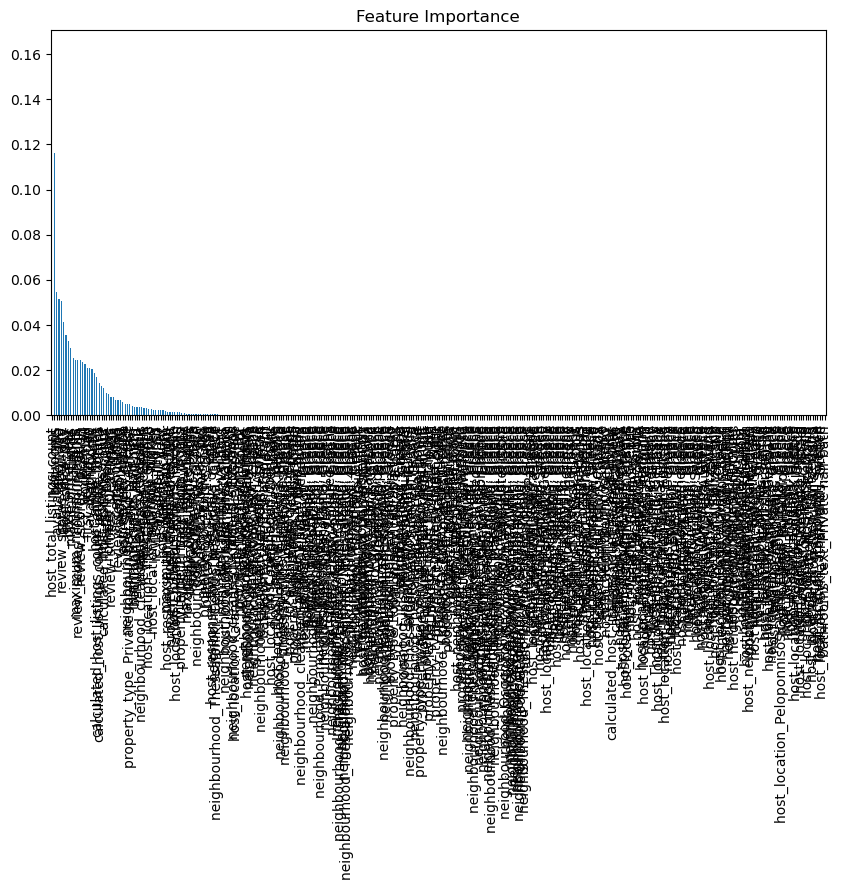

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plotten
feat_imp.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.tight_layout()
plt.show()